In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [163]:
# Read the CSV
df = pd.read_csv('AirQuality_visualization.csv', delimiter=';')

# Rename columns for easier reference
df = df.rename(columns={
    'T': 'Temperature',
    'RH': 'Relative Humidity',
    'AH': 'Absolute Humidity'
})

# Drop unnecessary columns
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Convert comma decimal to float for important columns
for col in ['CO(GT)', 'C6H6(GT)', 'Temperature', 'Relative Humidity', 'Absolute Humidity']:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Check the structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               9357 non-null   object 
 1   Time               9357 non-null   object 
 2   CO(GT)             9357 non-null   float64
 3   PT08.S1(CO)        9357 non-null   float64
 4   NMHC(GT)           9357 non-null   float64
 5   C6H6(GT)           9357 non-null   float64
 6   PT08.S2(NMHC)      9357 non-null   float64
 7   NOx(GT)            9357 non-null   float64
 8   PT08.S3(NOx)       9357 non-null   float64
 9   NO2(GT)            9357 non-null   float64
 10  PT08.S4(NO2)       9357 non-null   float64
 11  PT08.S5(O3)        9357 non-null   float64
 12  Temperature        9357 non-null   float64
 13  Relative Humidity  9357 non-null   float64
 14  Absolute Humidity  9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [164]:
# Drop duplicate rows
df = df.drop_duplicates()

# Fill numeric columns with their mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop any rows still having missing values
df = df.dropna()

# Confirm no missing values
print(df.isna().sum())


Date                 0
Time                 0
CO(GT)               0
PT08.S1(CO)          0
NMHC(GT)             0
C6H6(GT)             0
PT08.S2(NMHC)        0
NOx(GT)              0
PT08.S3(NOx)         0
NO2(GT)              0
PT08.S4(NO2)         0
PT08.S5(O3)          0
Temperature          0
Relative Humidity    0
Absolute Humidity    0
dtype: int64


<ipython-input-164-e57c1ed934b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [165]:
# Scale Absolute Humidity
df['Absolute Humidity'] = df['Absolute Humidity'] * 100

# Extract Year and Month from Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [166]:
# Function to remove outliers based on IQR
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

# Remove outliers from selected columns
col_name = ['Temperature', 'Relative Humidity', 'Absolute Humidity',
            'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)',
            'PT08.S2(NMHC)', 'PT08.S1(CO)']

for col in col_name:
    df[col] = remove_outliers(df[col])


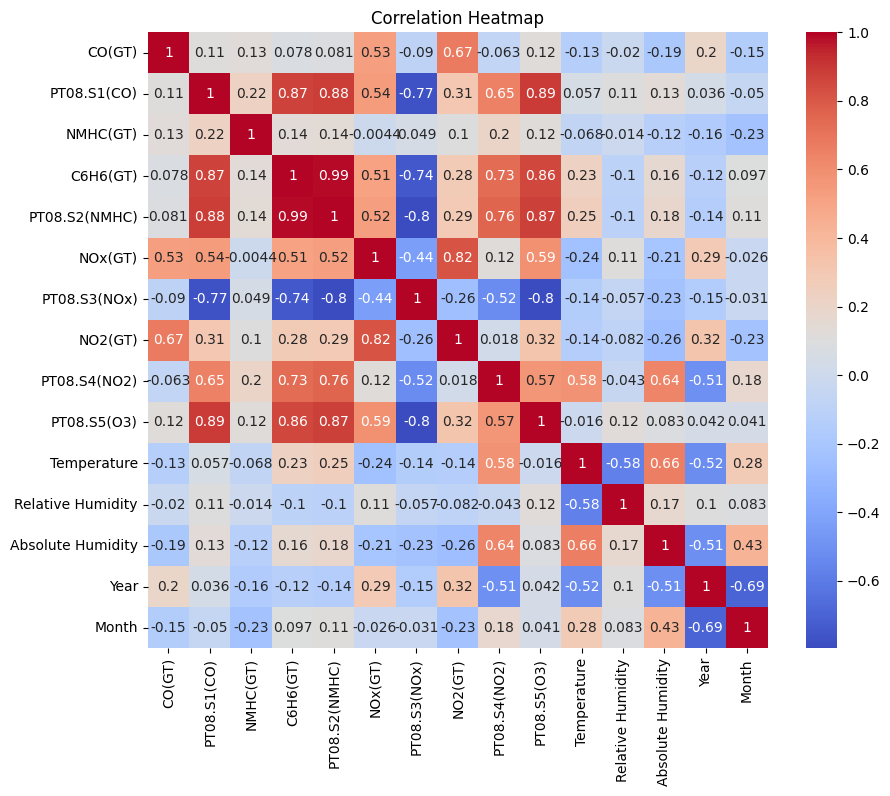

In [168]:
# Drop non-numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Now plot the heatmap on only numeric data
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


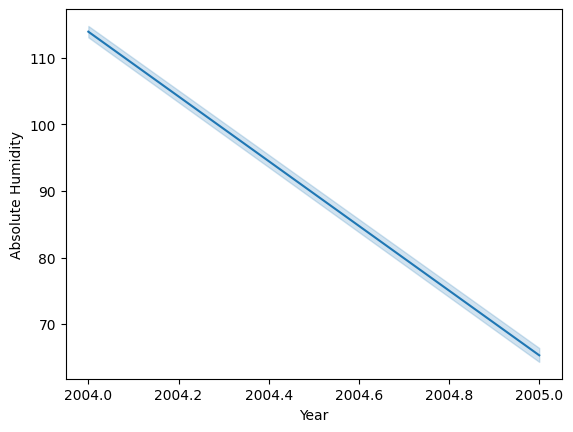

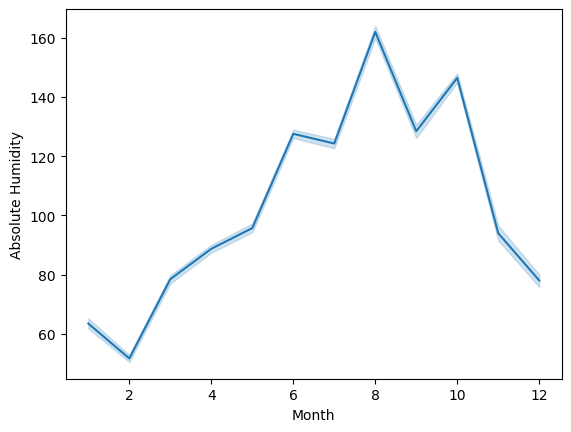

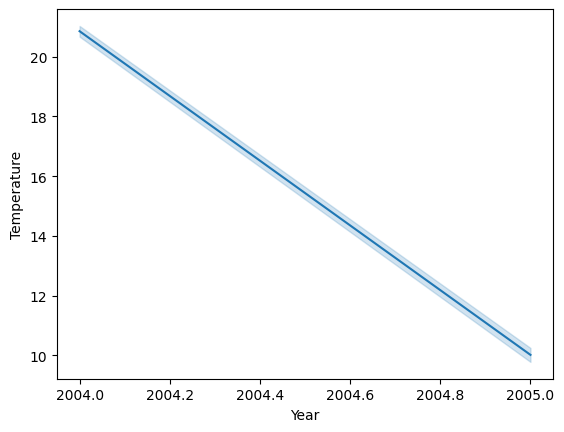

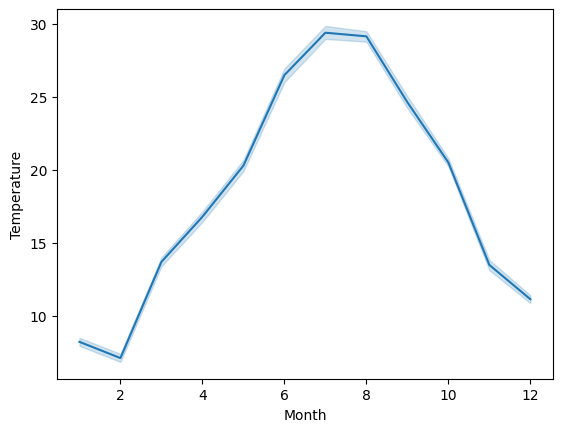

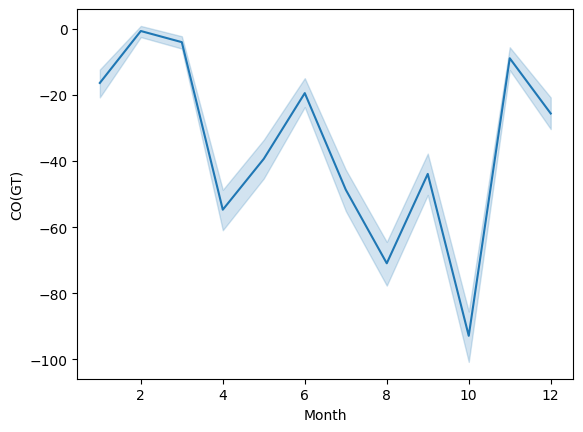

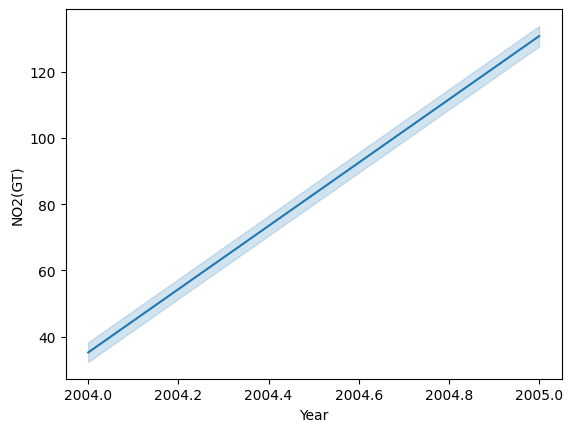

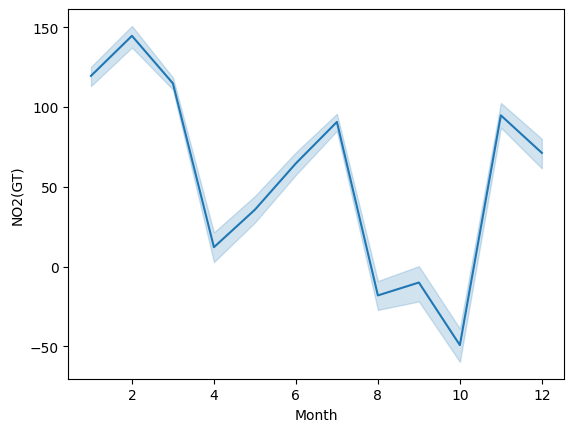

In [169]:
sns.lineplot(data=df, x="Year", y='Absolute Humidity')
plt.show()

sns.lineplot(data=df, x="Month", y='Absolute Humidity')
plt.show()

sns.lineplot(data=df, x="Year", y='Temperature')
plt.show()

sns.lineplot(data=df, x="Month", y='Temperature')
plt.show()

sns.lineplot(data=df, x="Month", y='CO(GT)')
plt.show()

sns.lineplot(data=df, x="Year", y='NO2(GT)')
plt.show()

sns.lineplot(data=df, x="Month", y='NO2(GT)')
plt.show()


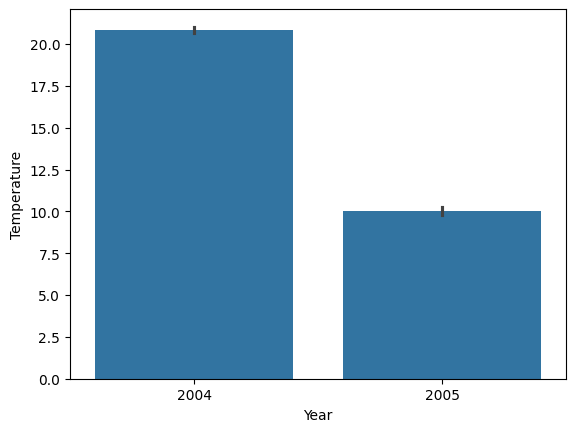

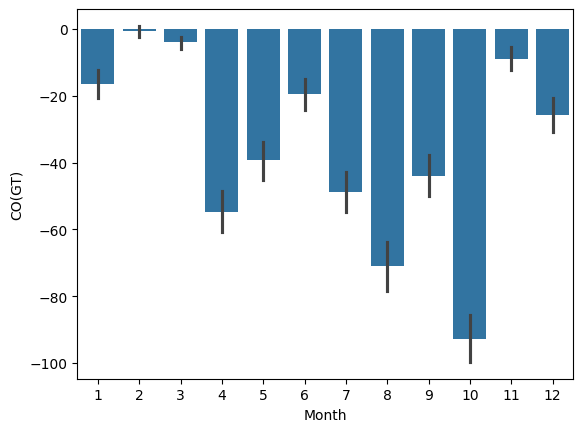

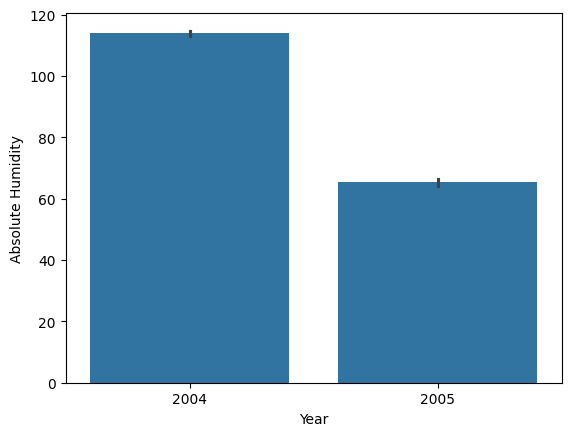

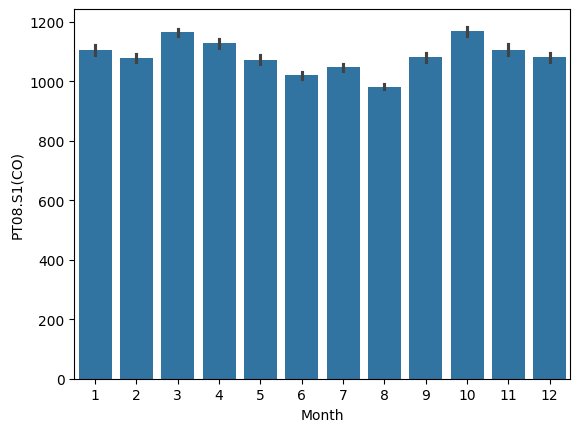

In [170]:
sns.barplot(data=df, x='Year', y='Temperature')
plt.show()

sns.barplot(data=df, x='Month', y='CO(GT)')
plt.show()

sns.barplot(data=df, x='Year', y='Absolute Humidity')
plt.show()

sns.barplot(data=df, x='Month', y='PT08.S1(CO)')
plt.show()


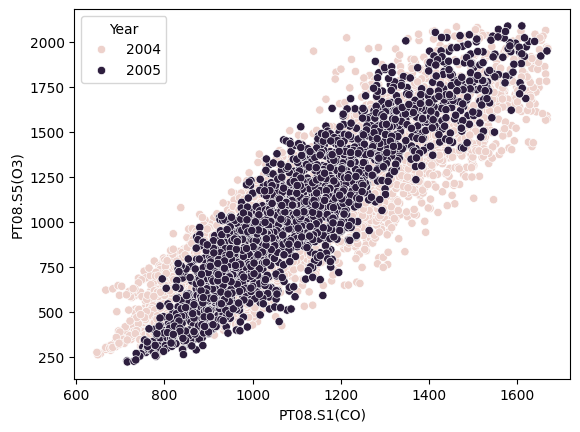

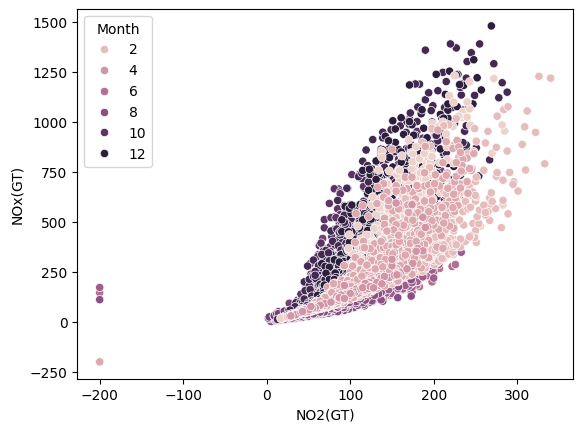

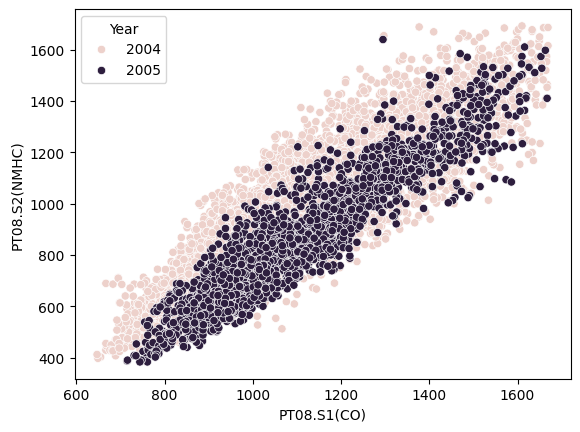

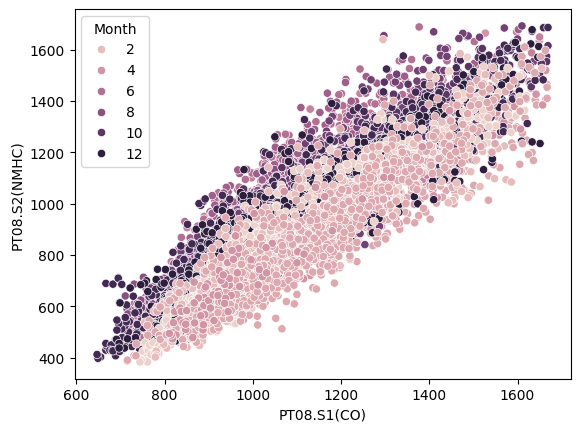

In [171]:
sns.scatterplot(data=df, x='PT08.S1(CO)', y='PT08.S5(O3)', hue='Year')
plt.show()

sns.scatterplot(data=df, x='NO2(GT)', y='NOx(GT)', hue='Month')
plt.show()

sns.scatterplot(data=df, y='PT08.S2(NMHC)', x='PT08.S1(CO)', hue='Year')
plt.show()

sns.scatterplot(data=df, y='PT08.S2(NMHC)', x='PT08.S1(CO)', hue='Month')
plt.show()
